In [9]:
print(pooled_map)



[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.]
 [-1. 51. 50. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.]
 [-1. 52. 51. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.]
 [-1. 50. 52. 50. -1. -1. -1. -1. 53. 50. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.]
 [-1. 51. 55. 52. 50. -1. -1. -1. 50. 51. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.]
 [-1. -1. 50. 52. 50. -1. -1. -1. 50. 57. 56. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.]
 [-1. -1. 50. 50. 47. 50. -1. -1. -1. 54. 59. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.]
 [-1. -1. -1. 50. 50. 50. 50. -1. -1. 50. 56. 50. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.]
 [-1. -1. -1. -1. 50. 49. 50. 50. 80. 97. 96. 75. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. 50. 53. 98. 97. 75.  0. 92. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. 86. 90.  0.  0.  0. 94. 77. -1. -1. -1. -1. 

In [ ]:
#manually pool map
occ_grid = the_map
occ_grid = F.pad(occ_grid, (0, 3 - occ_grid.shape[1] % 3, 0, 3 - occ_grid.shape[0] % 3), value=-1) 
# Apply max pooling to the occupancy grid
occ_grid = occ_grid.reshape(1,1,occ_grid.shape[0], occ_grid.shape[1])
occ_grid_pooled = F.max_pool2d(occ_grid, 3,3).reshape(occ_grid.shape[2]//3, occ_grid.shape[3]//3)

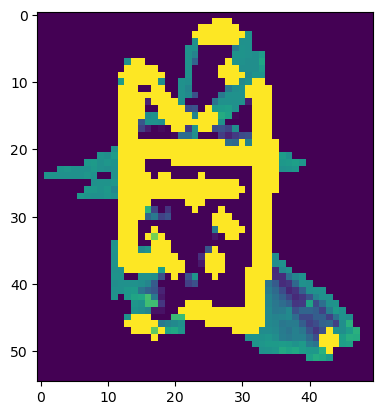

In [11]:
def expand_ones_to_neighbors(arr):
        # Create a copy of the original array
        result = arr.copy()
        
        # Get the shape of the array
        rows, cols = arr.shape
        
        # Find positions of all 1s in the original array
        one_positions = np.where(arr > 70)
        
        # Define the 4 adjacent directions (up, down, left, right)
        # (row change, column change)
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        
        # For each position with a 1, set all valid neighbors to 1
        for i, j in zip(one_positions[0], one_positions[1]):
            # Check the 4 adjacent directions
            for di, dj in directions:
                # Calculate neighbor coordinates
                ni, nj = i + di, j + dj
                
                # Check if the neighbor is within bounds
                if 0 <= ni < rows and 0 <= nj < cols:
                    result[ni, nj] = 100
        
        return result

pooled_map = expand_ones_to_neighbors(pooled_map)
plt.imshow(pooled_map)
plt.show()

(48, 54)
(149, 168)
(48, 54)


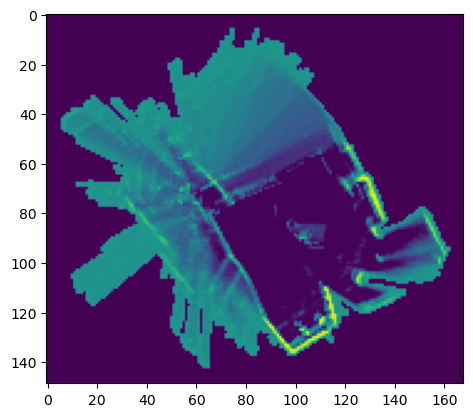

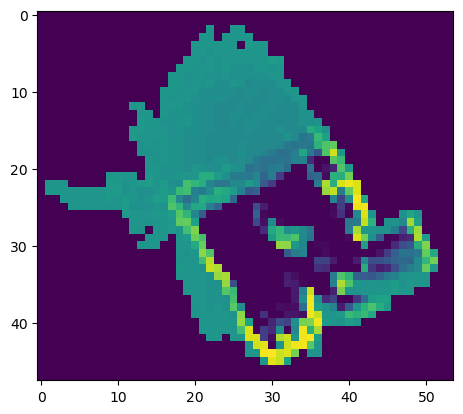

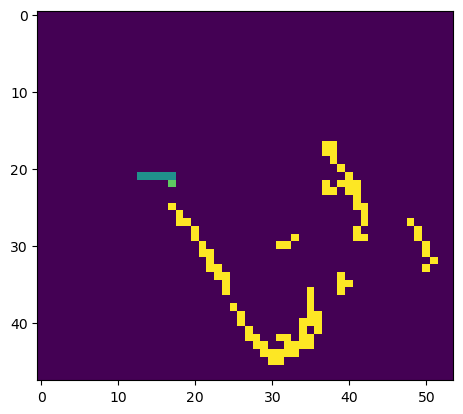

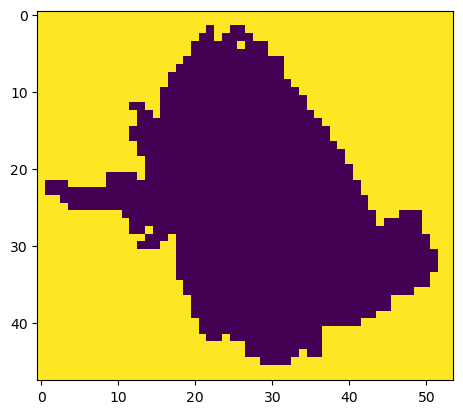

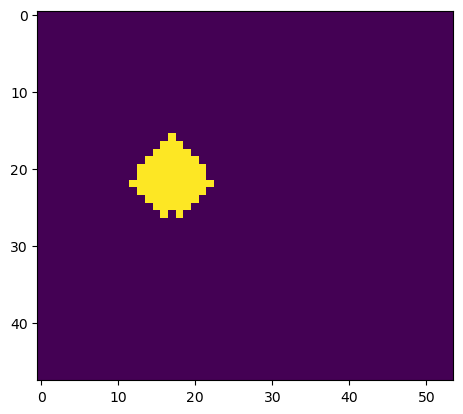

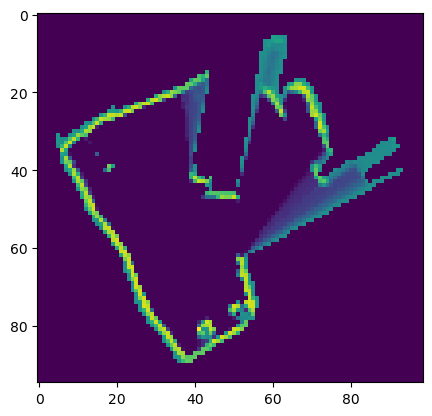

In [2]:
import numpy as np
import torch
import torch.nn.functional as F
pooled_map = np.loadtxt('pooled_map.txt')
the_map = np.loadtxt('map.txt')
path_map = np.loadtxt('path_map.txt')
unknown_map = np.loadtxt('unknown_map.txt')
visited_map = np.loadtxt('visited_map.txt')
heat_source_map = np.loadtxt('heat_source_map.txt')

print(pooled_map.shape)
print(the_map.shape)
print(path_map.shape)
#show map
import matplotlib.pyplot as plt
plt.imshow(the_map)
plt.show()
plt.imshow(pooled_map)
plt.show()
plt.imshow(path_map)
plt.show()
plt.imshow(unknown_map)
plt.show()
plt.imshow(visited_map)
plt.show()
plt.imshow(heat_source_map)
plt.show()
